# Problem Statement

Building the Machine Learning Binary Classification model to predict if the person is diabetic or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# #Import Dataset
data = pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Features

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age

### Label

Outcome
* 0-Normal
* 1-Diabetes

In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# So there is no null value but we have value 0 in some feature column we need to resolve it.

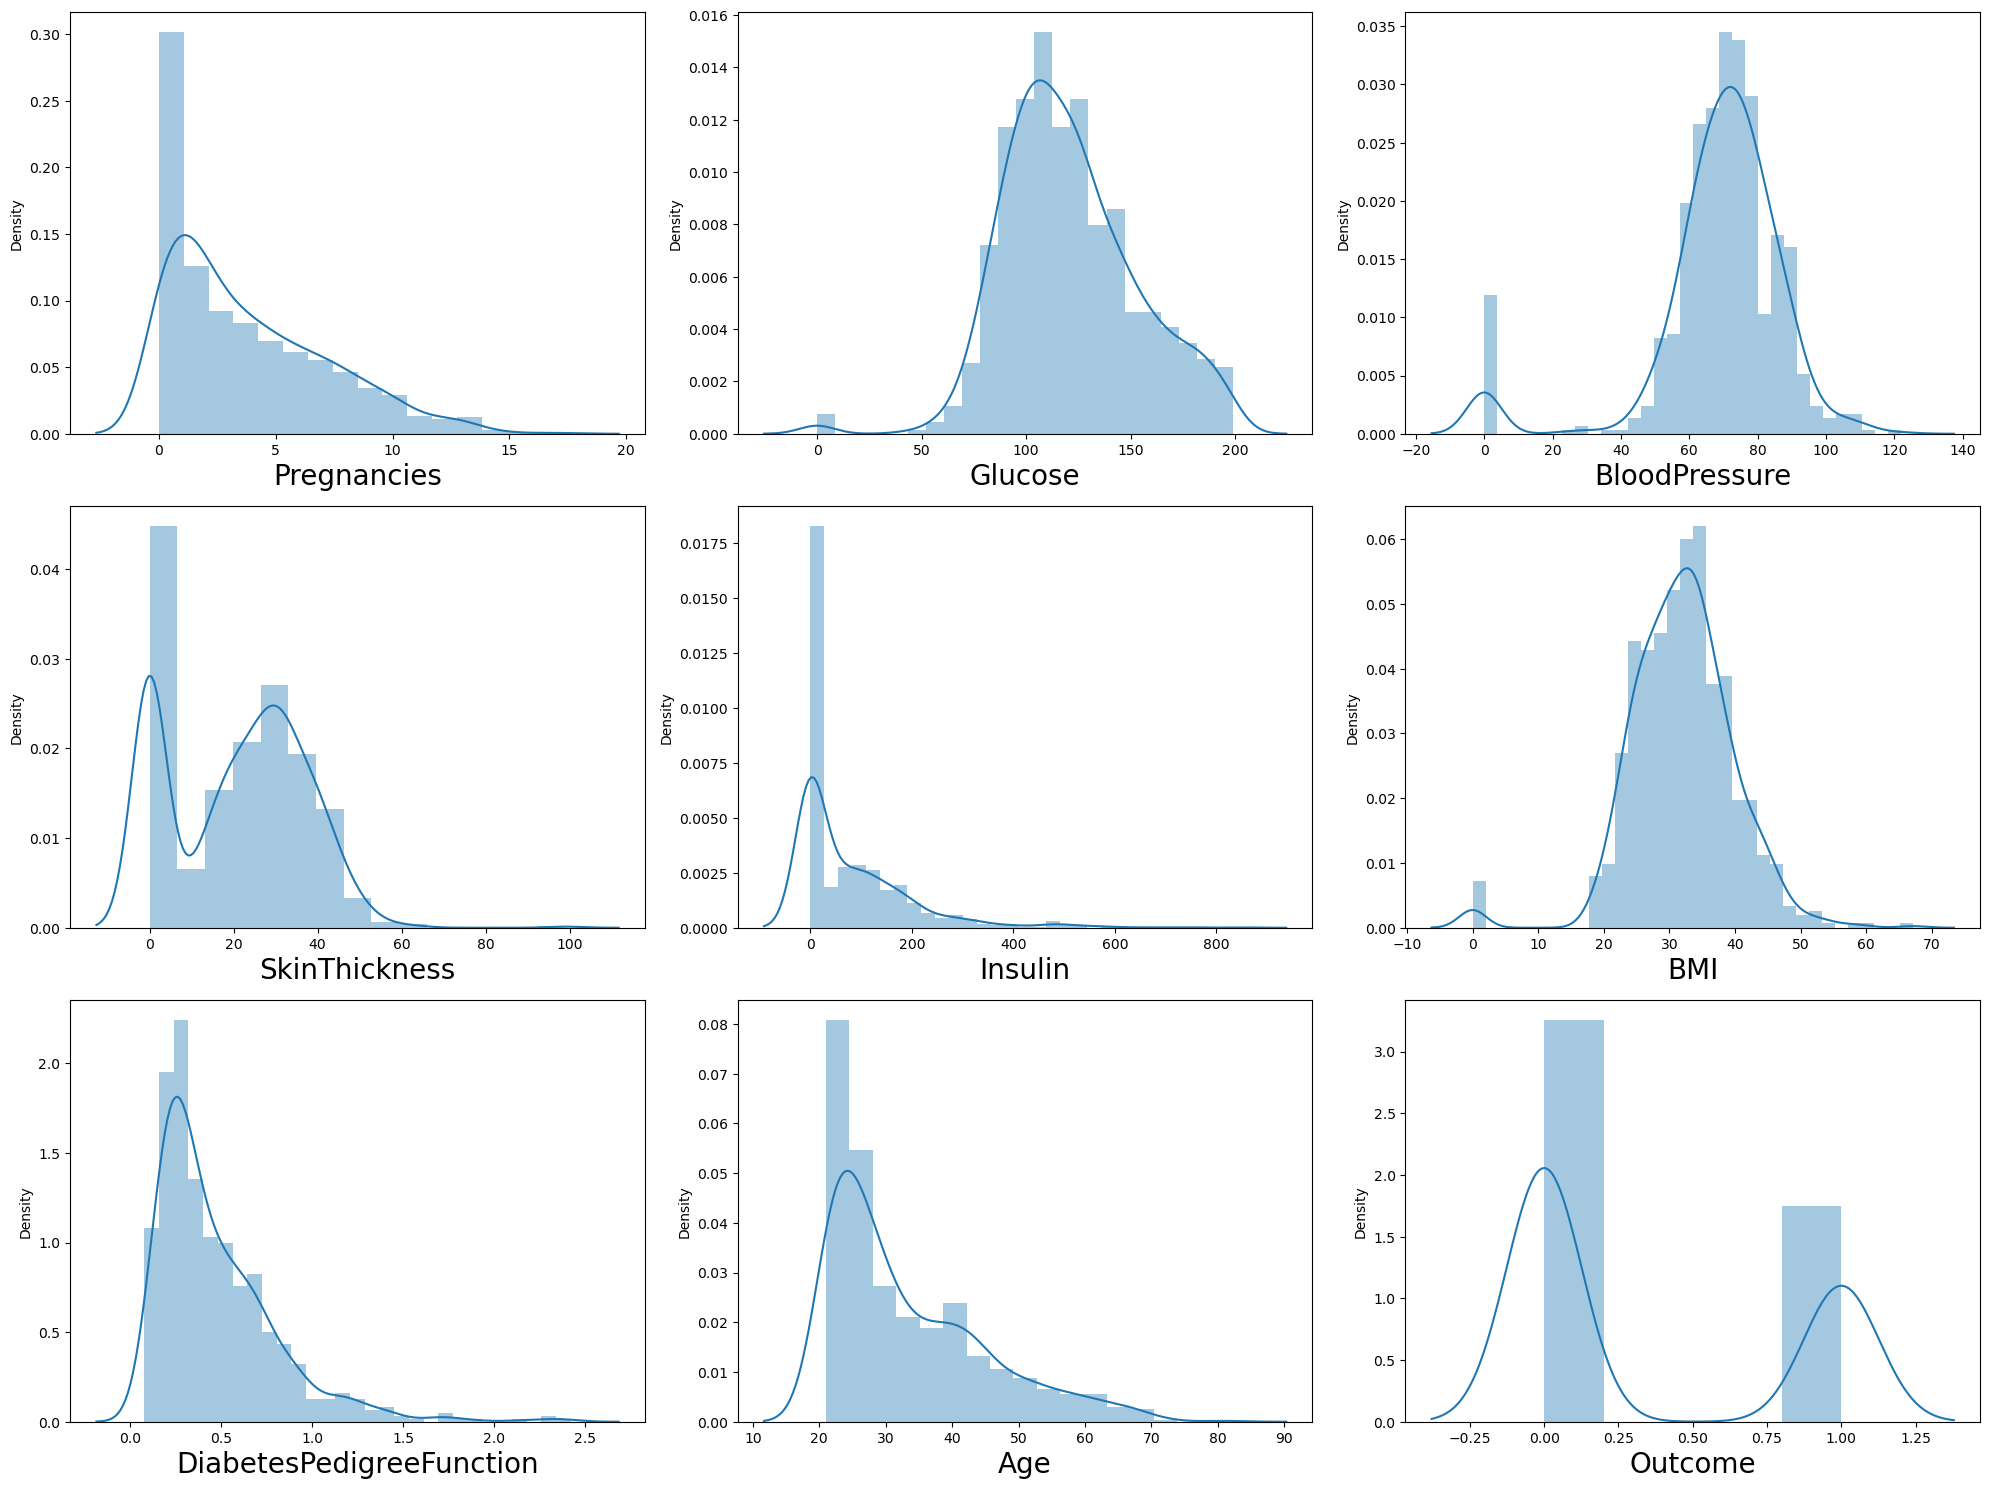

In [8]:
# Distribution plot
plt.figure(figsize=(20,15))
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

As we can seee that there is o values in feature column like (Glucose, BloodPressure, SkinThickness, Insulin, BMI) we need solve this problem.

In [9]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

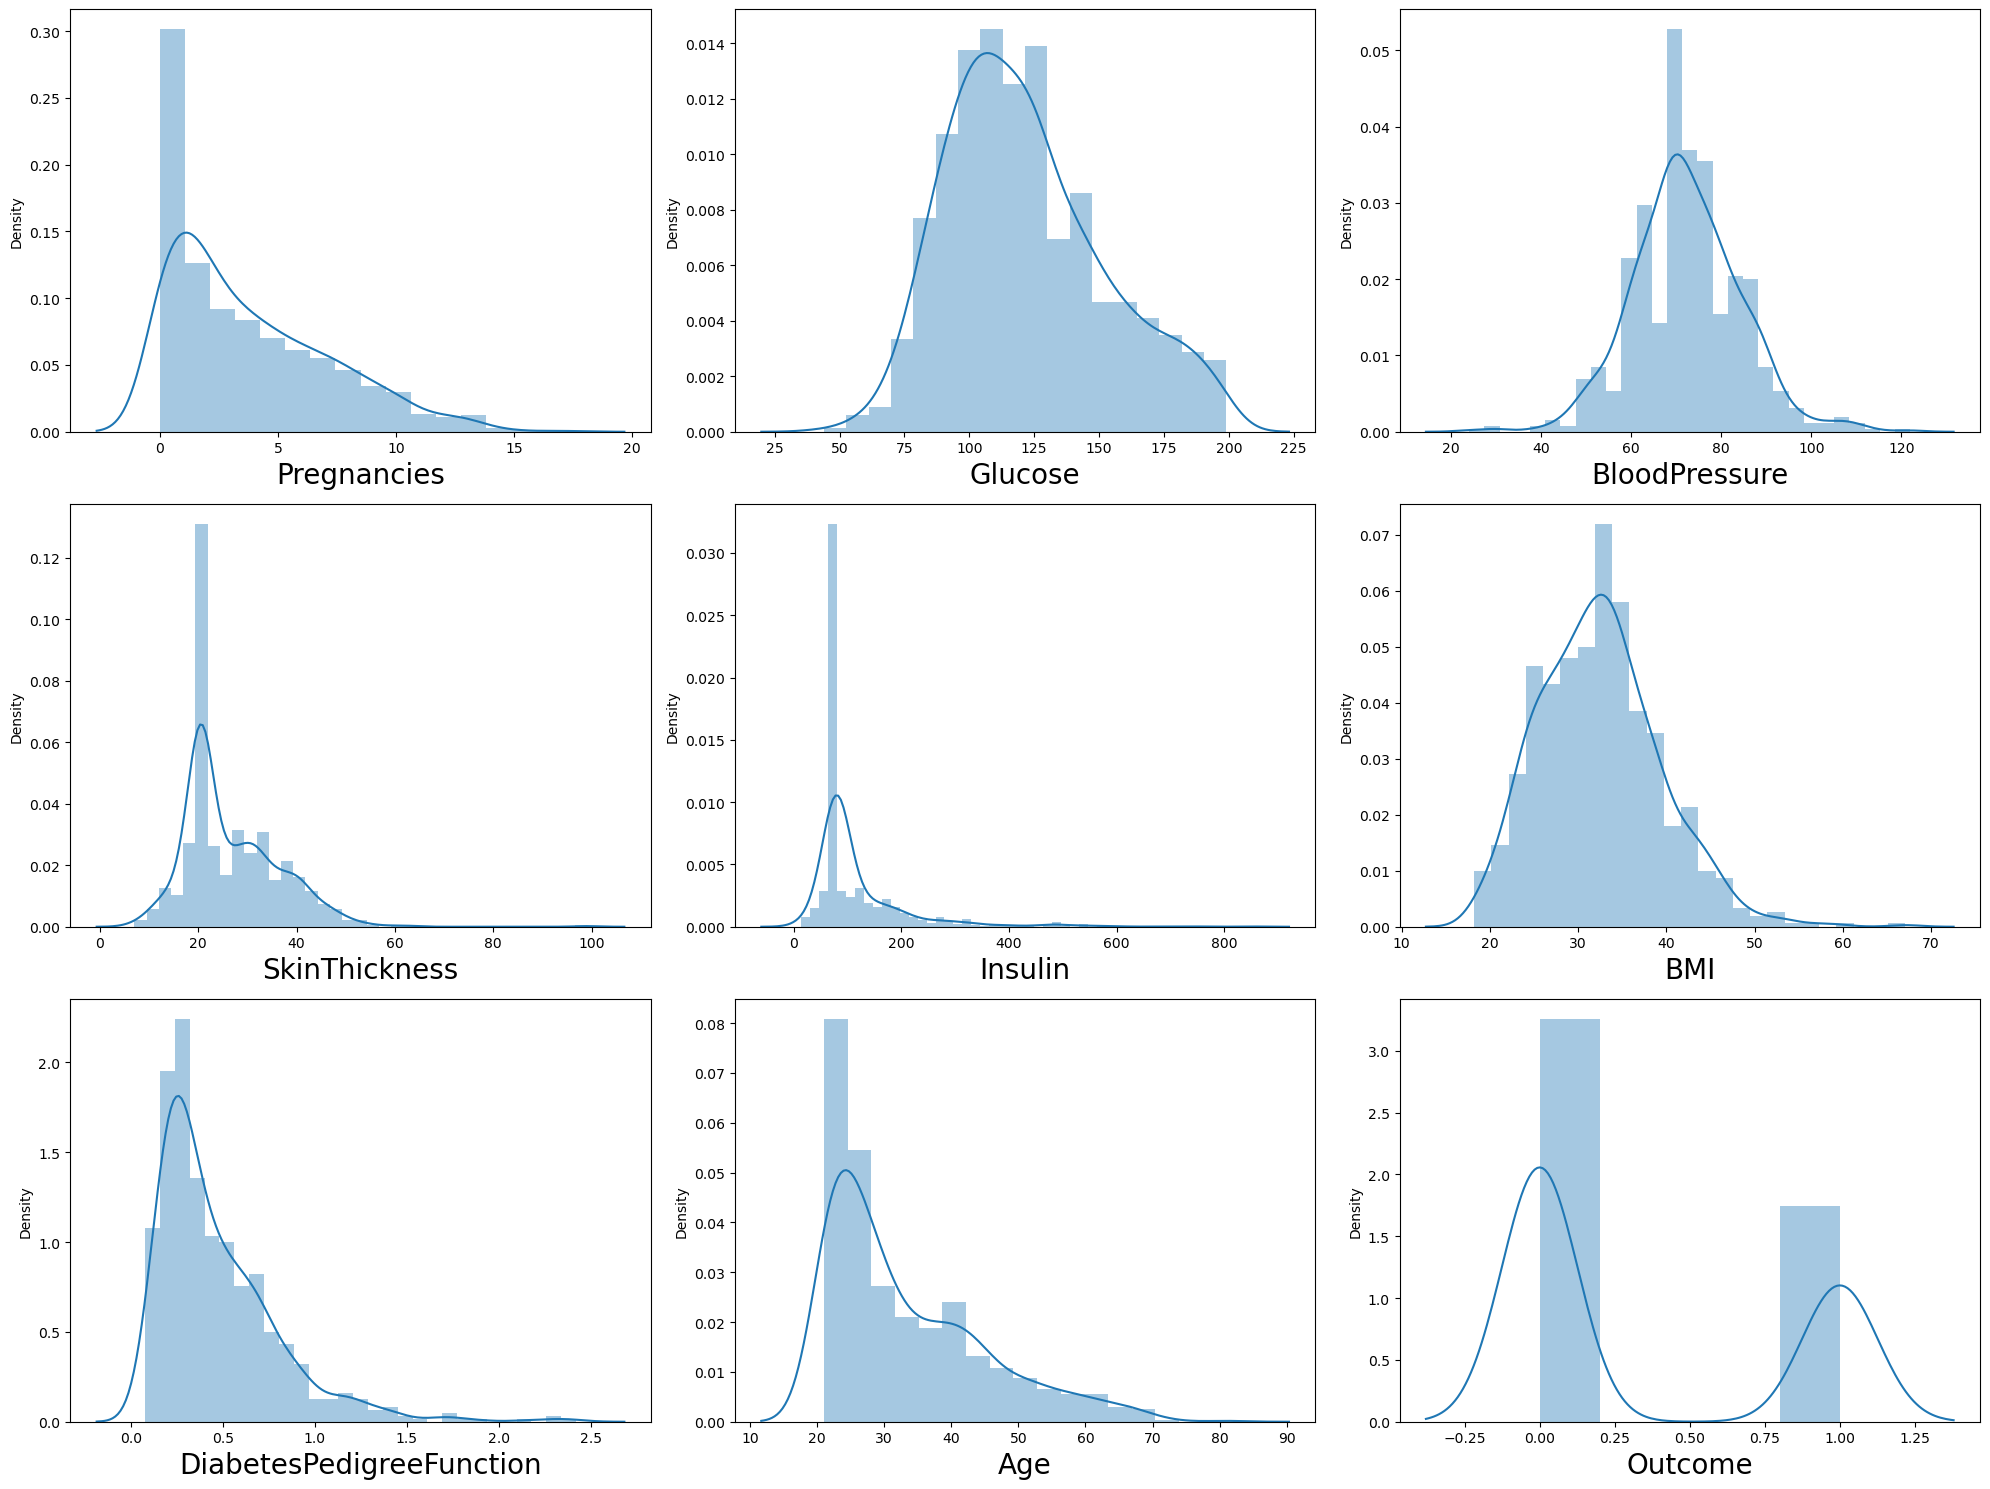

In [10]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

### Checking the Outliers

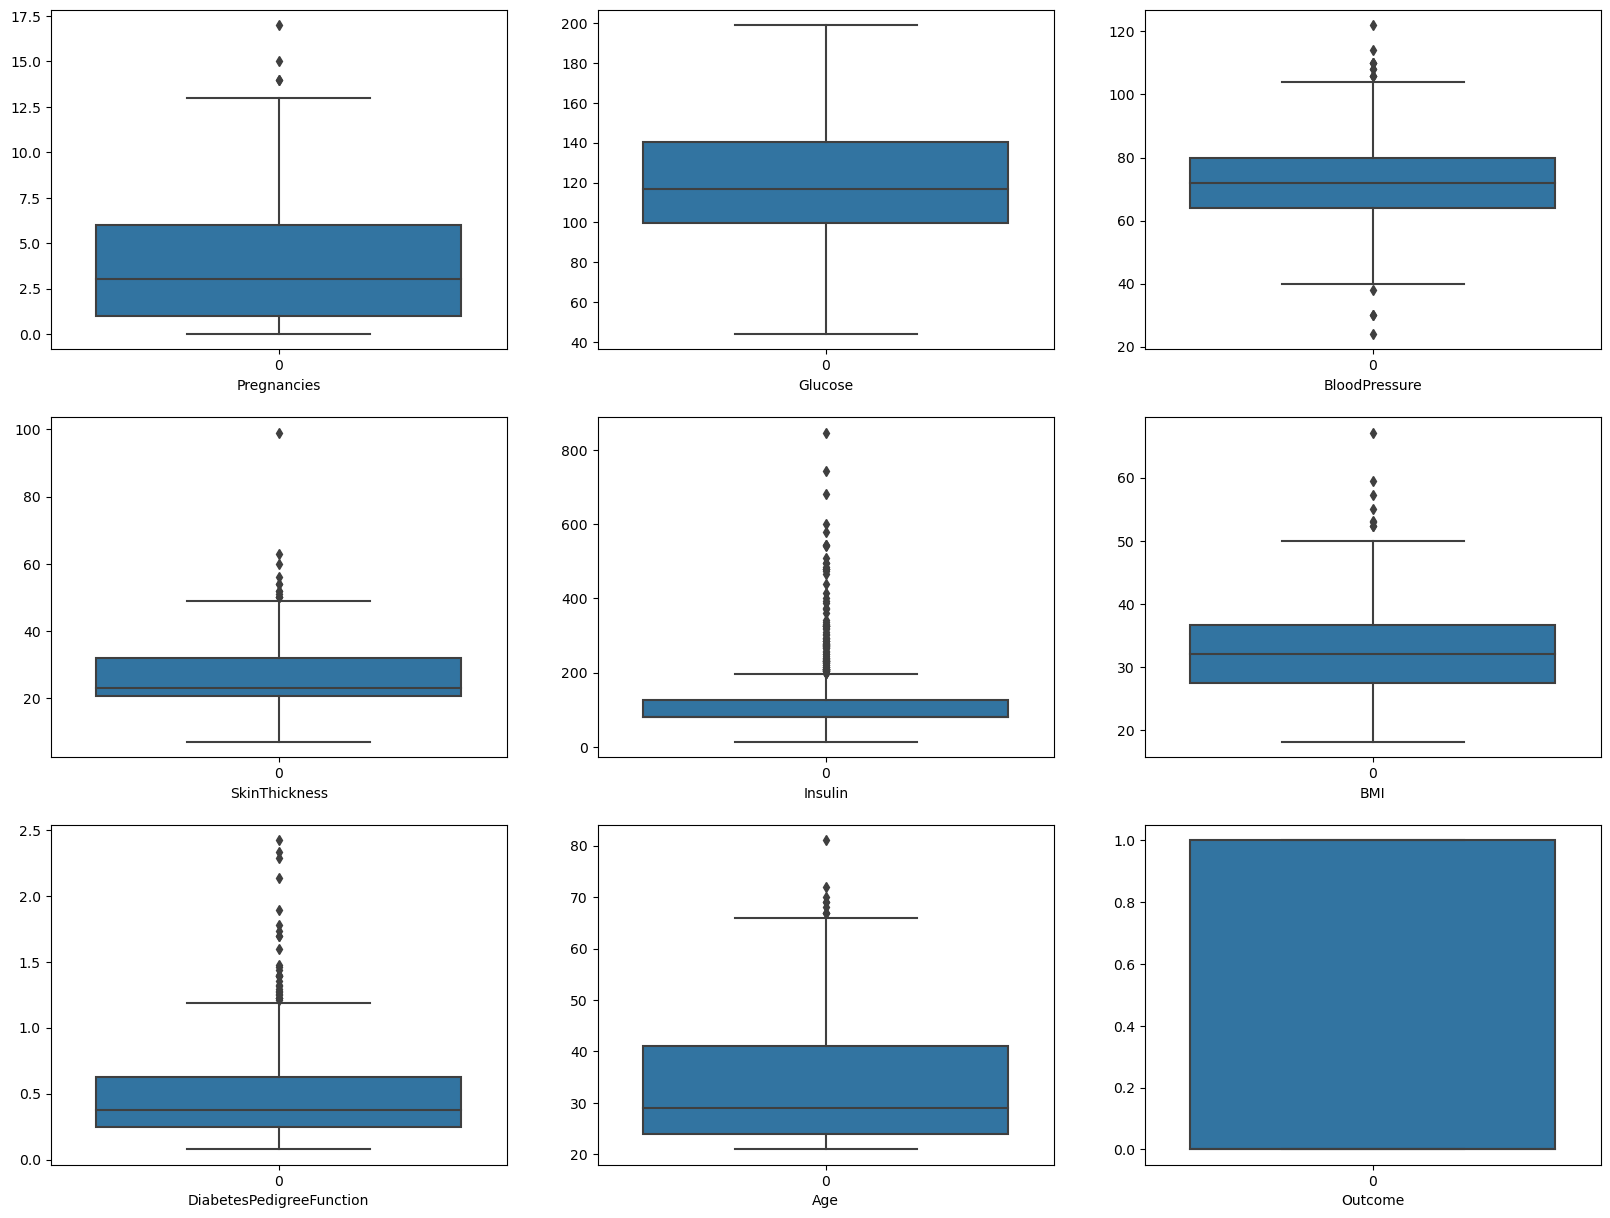

In [11]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
    plotnumber +=1
plt.show()

We can see we have lots of outliers so we have to remove this outliers.

In [12]:
# Let's handle outliers

q1=data.quantile (0.25)
q3=data.quantile (0.75)

In [13]:
iqr=q3-q1
print(q1)
print(q3)
print(iqr)

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382

In [14]:
#Pregnancies
preg=q3.Pregnancies +(1.5*iqr.Pregnancies)
index=np.where(data['Pregnancies'] > preg)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [15]:
#For lower Outliers
#BloodPressure
bp=q1.BloodPressure -(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']<bp)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(760, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
755,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
756,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
757,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
758,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
#For Upper Outliers
#SkinThickness
sk=q3.SkinThickness +(1.5 * iqr.SkinThickness)
index=np.where(data['SkinThickness']>sk)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(748, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
743,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
744,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
745,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
746,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
#Insulin
ins=iqr.Insulin + (1.5*iqr.Insulin)
index=np.where(data['Insulin']>ins)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(542, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
537,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
538,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
539,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
540,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
#BMI
bm=q3.BMI * (1.5 + iqr.BMI)
index=np.where(data['BMI']>bm)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(542, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
537,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
538,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
539,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
540,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
#DiabetesPedigreeFunction
dbs=q3.DiabetesPedigreeFunction + (1.5 *iqr.DiabetesPedigreeFunction)
index=np.where(data['DiabetesPedigreeFunction']>dbs)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(525, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
520,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
521,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
522,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
523,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### Now let's check the relationship

In [20]:
x=data.drop(columns=['Outcome'])
y=data.Outcome

In [21]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [22]:
y

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 525, dtype: int64

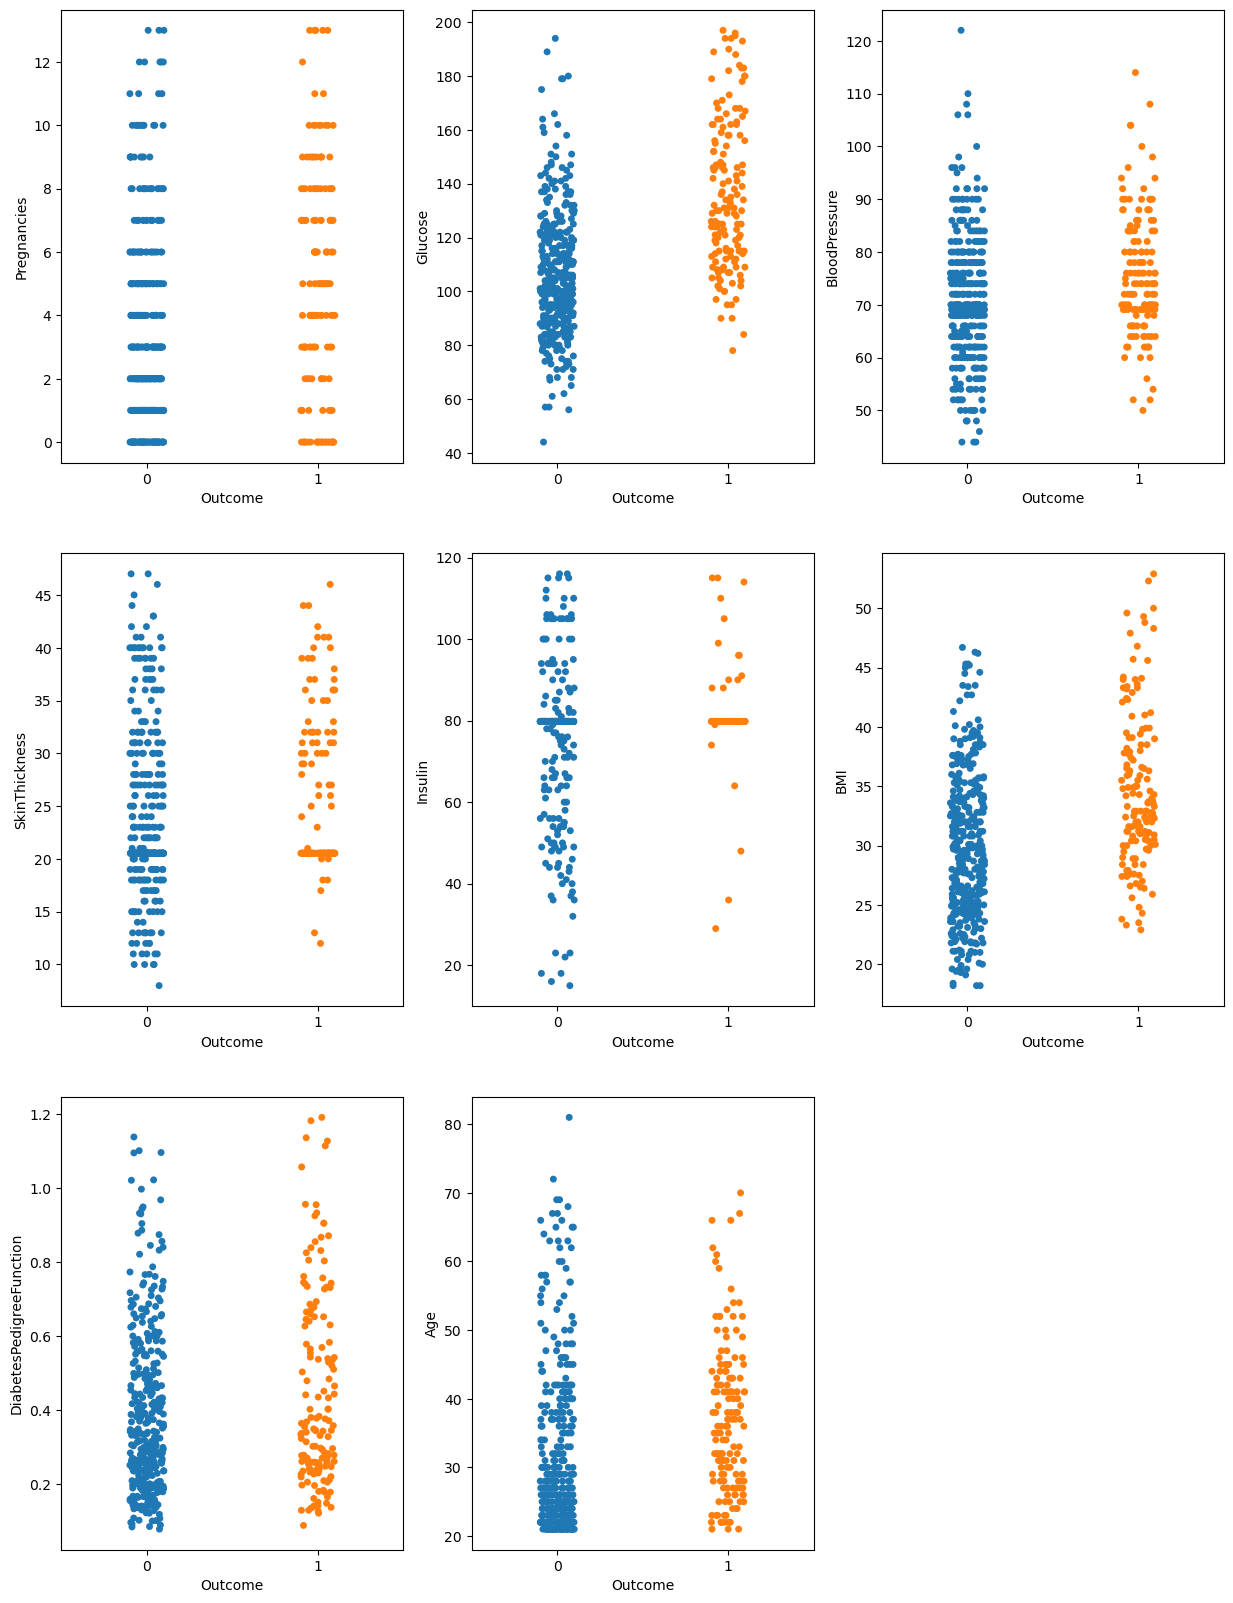

In [23]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [25]:
# Let's Standardize the data
scaler=StandardScaler()

In [26]:
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 0.64147251,  1.20159162, -0.03246357, ...,  0.35561551,
         0.96644089,  1.38900454],
       [-0.88515065, -1.05234748, -0.54713219, ..., -0.71720887,
        -0.20387188, -0.1843909 ],
       [ 1.25212178,  2.45378001, -0.7186884 , ..., -1.22296893,
         1.15725276, -0.10158062],
       ...,
       [ 0.33614788,  0.23561772, -0.03246357, ..., -0.77851312,
        -0.65333982, -0.26720119],
       [-0.88515065,  0.41450178, -1.06180081, ..., -0.18079668,
        -0.2123524 ,  1.14057368],
       [-0.88515065, -0.76613299, -0.20401977, ..., -0.13481849,
        -0.35652137, -0.8468732 ]])

In [27]:
#Lets check VIF
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.356207,Pregnancies
1,1.207326,Glucose
2,1.285125,BloodPressure
3,1.269694,SkinThickness
4,1.052030,Insulin
5,1.401206,BMI
6,1.018842,DiabetesPedigreeFunction
7,1.551508,Age


In our model there is no multicollinearty problem.

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size = 0.25,random_state = 42)

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [31]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7727272727272727


In [32]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[80,  9],
       [21, 22]])

In [33]:
(80+22)/(80+9+21+22)

0.7727272727272727